In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [146]:
df = pd.read_csv("dataset.csv")

In [147]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [148]:
df.shape

(100000, 9)

In [149]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [150]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [151]:
df["age"].value_counts().min()

36

In [152]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: xlabel='diabetes'>

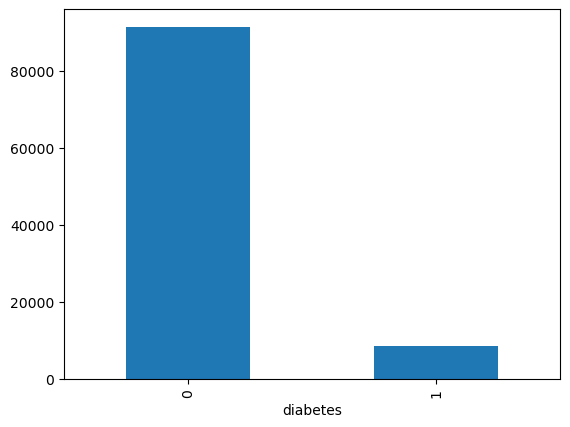

In [153]:
df["diabetes"].value_counts().plot(kind="bar")

In [154]:
count_no_info = df[df['smoking_history'] == 'No Info'].shape[0]
count_no_info

35816

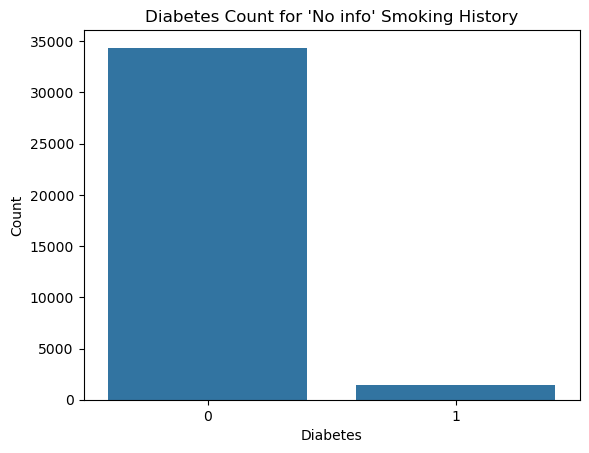

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df[df['smoking_history'] == 'No Info'], x='diabetes')

plt.title("Diabetes Count for 'No info' Smoking History")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

In [156]:
df_no_info = df[df['smoking_history'] == 'No Info']
diabetes_counts_no_info = df_no_info['diabetes'].value_counts()

print("Diabetes counts for 'No info' smoking history:")
print(diabetes_counts_no_info)

Diabetes counts for 'No info' smoking history:
diabetes
0    34362
1     1454
Name: count, dtype: int64


In [157]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [158]:
# Replace 'No Info' with NaN
df["smoking_history"] = df["smoking_history"].replace('No Info', np.nan)

# Verify the changes
print(df["smoking_history"].value_counts(dropna=False))

smoking_history
NaN            35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [159]:
# Calculate the mode of the "smoking_history" column
mode_value = df["smoking_history"].mode()[0]

# Replace null values with the mode
df["smoking_history"] = df["smoking_history"].fillna(mode_value)

# Verify the changes
print(df["smoking_history"].value_counts())


smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [160]:
df["smoking_history"].value_counts()


smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [161]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,never,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [162]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [163]:
df["hypertension"].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [164]:
df["heart_disease"].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [165]:
# Detecting outliers in 'bmi' using IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

In [166]:
# Filtering out the outliers
df_no_outliers = df[~((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))]

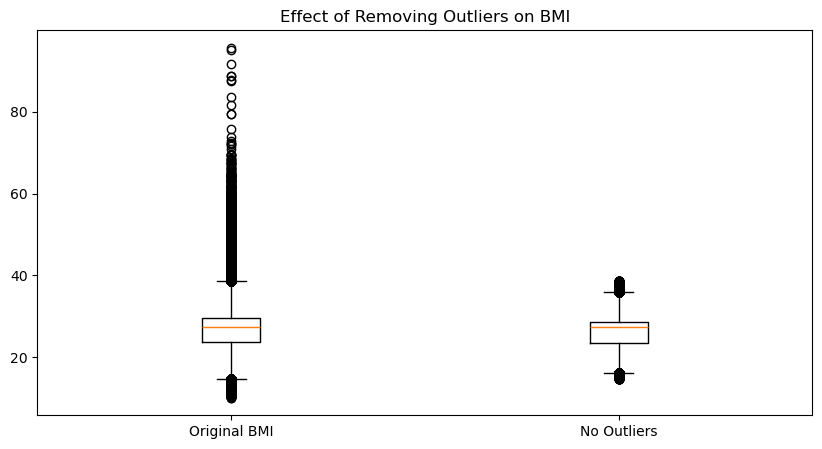

In [167]:
plt.figure(figsize=(10, 5))
plt.boxplot([df['bmi'], df_no_outliers['bmi']], labels=['Original BMI', 'No Outliers'])
plt.title('Effect of Removing Outliers on BMI')
plt.show()

In [168]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the 'bmi' column
df_no_outliers['bmi_normalized'] = scaler.fit_transform(df_no_outliers[['bmi']])

# Apply the scaler to the 'HbA1c_level' column
df_no_outliers['HbA1c_normalized'] = scaler.fit_transform(df_no_outliers[['HbA1c_level']])

# Fit the scaler on both 'bmi' and 'HbA1c_level' columns together
scaler.fit(df[['bmi', 'HbA1c_level']])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25668\548467545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['bmi_normalized'] = scaler.fit_transform(df_no_outliers[['bmi']])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25668\548467545.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['HbA1c_normalized'] = scaler.fit_transform(df_no_outliers[['HbA1c_level']])


MinMaxScaler()

In [169]:
df.shape

(100000, 9)

In [170]:
df_no_outliers.shape

(92914, 11)

In [171]:
df_no_outliers.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_normalized,HbA1c_normalized
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.440521,0.563636
1,Female,54.0,0,0,never,27.32,6.6,80,0,0.530055,0.563636
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.530055,0.400000
3,Female,36.0,0,0,current,23.45,5.0,155,0,0.367381,0.272727
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.228247,0.236364


In [172]:
# Define bins for age groups and assign labels
bins = [0, 18, 35, 60, 100]
labels = ['Child', 'Youth', 'Adult', 'Senior']

In [173]:
# # Discretize 'age' into categories
df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=bins, labels=labels)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25668\246668323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=bins, labels=labels)


In [174]:
# Display the first few rows to verify the changes
print(df_no_outliers[['age', 'age_group']].head())

    age age_group
0  80.0    Senior
1  54.0     Adult
2  28.0     Youth
3  36.0     Adult
4  76.0    Senior


In [175]:
# Define BMI categories according to the WHO BMI classification
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

In [176]:
# Create a BMI category based on the ranges
df_no_outliers['bmi_category'] = pd.cut(df_no_outliers['bmi'], bins=bmi_bins, labels=bmi_labels)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25668\185744636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['bmi_category'] = pd.cut(df_no_outliers['bmi'], bins=bmi_bins, labels=bmi_labels)


In [177]:
# Display the first few rows to verify the changes
print(df_no_outliers[['bmi', 'bmi_category']].head())

     bmi bmi_category
0  25.19   Overweight
1  27.32   Overweight
2  27.32   Overweight
3  23.45       Normal
4  20.14       Normal


In [178]:
df_no_outliers.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_normalized,HbA1c_normalized,age_group,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.440521,0.563636,Senior,Overweight
1,Female,54.0,0,0,never,27.32,6.6,80,0,0.530055,0.563636,Adult,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.530055,0.400000,Youth,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,0.367381,0.272727,Adult,Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.228247,0.236364,Senior,Normal


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoder = LabelEncoder()

df_no_outliers['gender'] = label_encoder.fit_transform(df_no_outliers['gender'])  # Female: 0, Male: 1
df_no_outliers['smoking_history'] = label_encoder.fit_transform(df_no_outliers['smoking_history'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25668\2288720760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['gender'] = label_encoder.fit_transform(df_no_outliers['gender'])  # Female: 0, Male: 1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25668\2288720760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['smoking_history'] = label_encoder.fit_transform(df_no_outliers['smoking_history'])


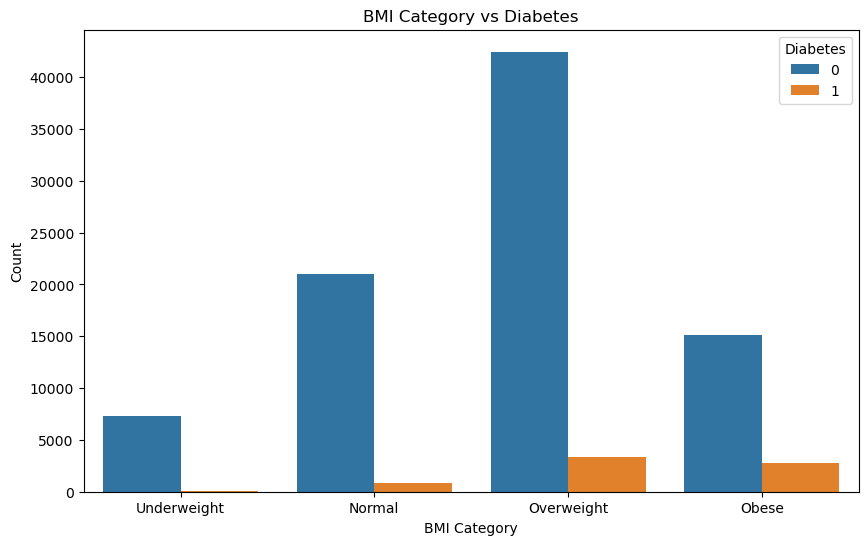

In [180]:
# Visualize the relationship between bmi_category and diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x=df_no_outliers['bmi_category'], hue=df_no_outliers['diabetes'])
plt.title('BMI Category vs Diabetes')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

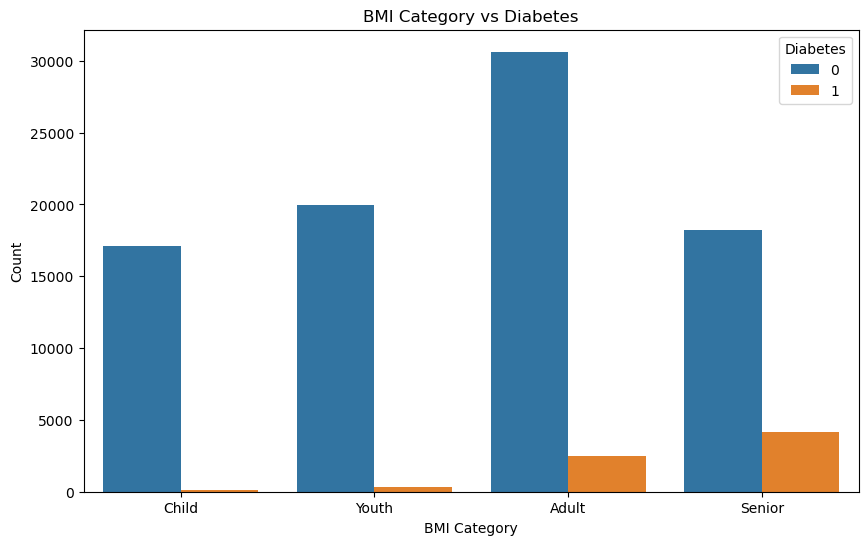

In [181]:
# Visualize the relationship between bmi_category and diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x=df_no_outliers['age_group'], hue=df_no_outliers['diabetes'])
plt.title('BMI Category vs Diabetes')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

In [182]:
df_no_outliers.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_normalized,HbA1c_normalized,age_group,bmi_category
0,0,80.0,0,1,3,25.19,6.6,140,0,0.440521,0.563636,Senior,Overweight
1,0,54.0,0,0,3,27.32,6.6,80,0,0.530055,0.563636,Adult,Overweight
2,1,28.0,0,0,3,27.32,5.7,158,0,0.530055,0.400000,Youth,Overweight
3,0,36.0,0,0,0,23.45,5.0,155,0,0.367381,0.272727,Adult,Normal
4,1,76.0,1,1,0,20.14,4.8,155,0,0.228247,0.236364,Senior,Normal


In [183]:
# Features and target
X = df_no_outliers.drop(columns=['diabetes','bmi','HbA1c_level','age_group','bmi_category'])  # Features (drop the target 'diabetes')
y = df_no_outliers['diabetes']                # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [185]:
y_smote.value_counts()

diabetes
0    68683
1    68683
Name: count, dtype: int64

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Best hyperparameters obtained from GridSearchCV
best_params = {
    'C': 0.1,  # Replace with the best 'C' value you found
    'penalty': 'l2'  # Replace with the best penalty you found
}

# Initialize the final model with the best hyperparameters
final_model = LogisticRegression(**best_params, max_iter=1000)

# Fit the model on the training set (using SMOTE balanced training data)
final_model.fit(x_smote, y_smote)

# Predictions on the testing set
y_test_pred_final = final_model.predict(X_test)

# Calculate testing accuracy
final_test_accuracy = accuracy_score(y_test, y_test_pred_final)

# Print the results
print(f'Final Logistic Regression Testing Accuracy: {final_test_accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_test_pred_final))

Final Logistic Regression Testing Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     17209
           1       0.38      0.87      0.53      1374

    accuracy                           0.89     18583
   macro avg       0.68      0.88      0.73     18583
weighted avg       0.94      0.89      0.90     18583



In [187]:
import pickle

# Save the best model to a pickle file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [188]:
# Save the fitted scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [189]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'blood_glucose_level', 'bmi_normalized', 'HbA1c_normalized'],
      dtype='object')

In [190]:
X["gender"].value_counts()

gender
0    53796
1    39101
2       17
Name: count, dtype: int64

In [191]:
X["smoking_history"].value_counts()

smoking_history
3    66119
0     8624
2     8506
4     5988
1     3677
Name: count, dtype: int64

In [192]:
df["smoking_history"].value_counts()

smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [207]:
# Sample DataFrame for testing
sample_data = pd.DataFrame({
    'gender': [0, 1],
    'age': [50, 30],
    'hypertension': [0, 1],
    'heart_disease': [0, 0],
    'smoking_history': [3, 2],
    'blood_glucose_level': [140, 160],
    'bmi_normalized': scaler.transform([[25, 30]]).flatten(),  # Corrected here
    'HbA1c_normalized': scaler.transform([[5.5, 6.0]]).flatten()  # Corrected here
})

# Predict using the best model
sample_predictions = final_model.predict(sample_data)
print(f'Sample Predictions: {sample_predictions}')

Sample Predictions: [0 1]


d:\softwares\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
d:\softwares\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [134]:
x_smote

,gender,age,hypertension,heart_disease,smoking_history,blood_glucose_level,bmi_normalized,HbA1c_normalized
0,0,77.000000,0,0,3,155,0.595628,0.236364
1,1,65.000000,1,0,0,260,0.453552,0.400000
2,0,80.000000,0,0,3,160,0.530055,0.490909
3,1,53.000000,0,0,3,126,0.530055,0.490909
4,1,80.000000,0,0,2,200,0.497688,0.545455
...,...,...,...,...,...,...,...,...
137361,0,66.715150,0,0,0,200,0.530528,0.844517
137362,0,54.000000,0,0,3,130,0.744238,0.490909
137363,0,49.490267,0,0,0,260,0.727480,0.722672
137364,1,80.000000,0,0,2,140,0.401928,0.400891


In [135]:
y_smote

0         0
1         1
2         0
3         0
4         0
         ..
137361    1
137362    1
137363    1
137364    1
137365    1
Name: diabetes, Length: 137366, dtype: int64